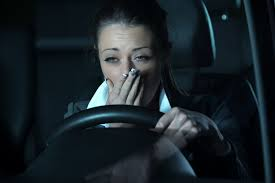

In [1]:
from IPython.display import Image
Image(filename='images.jpg')

In [2]:
# Voila Web App
## A website built out of a Jupyter notebook using Voila
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2

In [7]:
import cv2
cv2.__version__

'4.5.3'

In [3]:
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

ALARM_ON = False
thresh = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor(".\shape_predictor_68_face_landmarks.dat")# Dat file is the crux of the code

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_68_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_68_IDXS["right_eye"]
cap=cv2.VideoCapture(0)
flag=0
while True:
    ret, frame=cap.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    subjects = detect(gray, 0)
    for subject in subjects:
        shape = predict(gray, subject)
        shape = face_utils.shape_to_np(shape)#converting to NumPy Array
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        if ear < thresh:
            flag += 1
            print (flag)
            if flag >= frame_check:
                cv2.putText(frame, "*****ALERT!*****", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, "*****ALERT!*****", (10,325),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            print ("Drowsy")
        else:
            flag = 0
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break
cv2.destroyAllWindows()
#cap.stop()


1
Drowsy
2
Drowsy
